In [1]:
#Analysis of Electric Cars dataset, shown here:
#https://www.kaggle.com/kkhandekar/quickest-electric-cars-ev-database

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\users\vik\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
data_set=pd.read_csv('C:/Cars/Quickestelectriccars-EVDatabase.csv')
data_set= data_set[data_set.FastChargeSpeed != '-']
#data_set= data_set[data_set.PriceinGermany != 'NaN']
data_set['PriceinGermany'].replace('', np.nan, inplace=True)
data_set= data_set[data_set.PriceinGermany != 'NaN']
#data_set= data_set[data_set.PriceinGermany != ' ']

data_set.dropna(subset=['PriceinGermany'])

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"
5,Lucid Air Grand Touring,Battery Electric Vehicle | 110 kWh,3.2 sec,270 km/h,660 km,167 Wh/km,1380 km/h,All Wheel Drive,5,"€140,000","£125,000"
6,Tesla Model S Long Range,Battery Electric Vehicle | 90 kWh,3.2 sec,250 km/h,555 km,162 Wh/km,830 km/h,All Wheel Drive,5,"€86,990","£83,980"
7,Porsche Taycan Turbo,Battery Electric Vehicle | 83.7 kWh,3.2 sec,260 km/h,400 km,209 Wh/km,840 km/h,All Wheel Drive,4,"€153,016","£115,860"
8,Tesla Model 3 Performance,Battery Electric Vehicle | 76 kWh,3.3 sec,261 km/h,470 km,162 Wh/km,790 km/h,All Wheel Drive,5,"€58,560","£59,990"
9,Audi e-tron GT RS,Battery Electric Vehicle | 85 kWh,3.3 sec,250 km/h,405 km,210 Wh/km,810 km/h,All Wheel Drive,4,"€138,200","£110,950"


In [3]:
# Now strip string values from data, so we only have numeric
data_set['Acceleration'] = data_set['Acceleration'].map(lambda x: x.lstrip('+-').rstrip(' sec'))
data_set['TopSpeed'] = data_set['TopSpeed'].map(lambda x: x.lstrip('+-').rstrip(' km/h'))
data_set['Range'] = data_set['Range'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data_set['Efficiency'] = data_set['Efficiency'].map(lambda x: x.lstrip('+-').rstrip(' Wh/km'))
data_set['FastChargeSpeed'] = data_set['FastChargeSpeed'].map(lambda x: x.lstrip('+-').rstrip(' km/h'))
data_set["Acceleration"]=data_set.Acceleration.astype(float)
data_set["TopSpeed"]=data_set.TopSpeed.astype(float)
data_set["Range"]=data_set.Range.astype(float)
data_set["Efficiency"]=data_set.Efficiency.astype(float)
data_set['PriceinGermany'] = data_set['PriceinGermany'].astype(str).str.replace('\D+', '')

C:\Users\Vik\AppData\Local\Temp/ipykernel_1464/1679093885.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['PriceinGermany'] = data_set['PriceinGermany'].astype(str).str.replace('\D+', '')


In [4]:
data_set

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1,410.0,970.0,206.0,920,All Wheel Drive,4,215000,"£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6,262.0,455.0,198.0,680,All Wheel Drive,7,116990,"£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8,260.0,390.0,215.0,860,All Wheel Drive,4,186336,"£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9,250.0,380.0,220.0,790,All Wheel Drive,4,187746,"£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0,210.0,750.0,267.0,710,All Wheel Drive,7,75000,"£68,000"
5,Lucid Air Grand Touring,Battery Electric Vehicle | 110 kWh,3.2,270.0,660.0,167.0,1380,All Wheel Drive,5,140000,"£125,000"
6,Tesla Model S Long Range,Battery Electric Vehicle | 90 kWh,3.2,250.0,555.0,162.0,830,All Wheel Drive,5,86990,"£83,980"
7,Porsche Taycan Turbo,Battery Electric Vehicle | 83.7 kWh,3.2,260.0,400.0,209.0,840,All Wheel Drive,4,153016,"£115,860"
8,Tesla Model 3 Performance,Battery Electric Vehicle | 76 kWh,3.3,261.0,470.0,162.0,790,All Wheel Drive,5,58560,"£59,990"
9,Audi e-tron GT RS,Battery Electric Vehicle | 85 kWh,3.3,250.0,405.0,210.0,810,All Wheel Drive,4,138200,"£110,950"


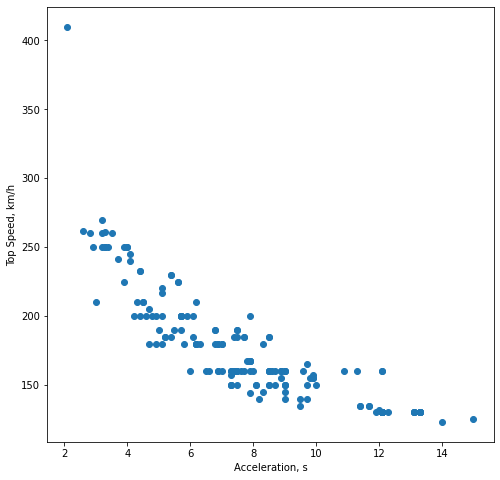

In [5]:
new_data=data_set[["Acceleration","TopSpeed","Range","Efficiency","FastChargeSpeed","PriceinGermany"]] #form new data_set
#Visualize data
x=new_data["Acceleration"]
y=new_data["TopSpeed"]
plt.figure(figsize=(8, 8))
plt.xlabel('Acceleration, s')
plt.ylabel('Top Speed, km/h')
plt.scatter(x, y) #could be modeled via Linear reg.


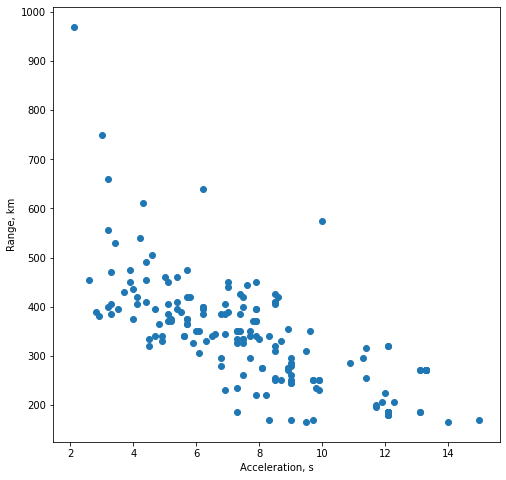

In [6]:
z=new_data["Range"]
plt.figure(figsize=(8, 8))
plt.xlabel('Acceleration, s')
plt.ylabel('Range, km')
plt.scatter(x, z)


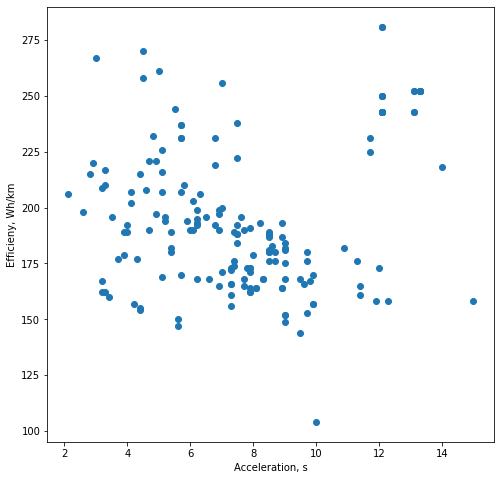

In [7]:
q=new_data["Efficiency"]
plt.figure(figsize=(8, 8))
plt.xlabel('Acceleration, s')
plt.ylabel('Efficieny, Wh/km')
plt.scatter(x, q)

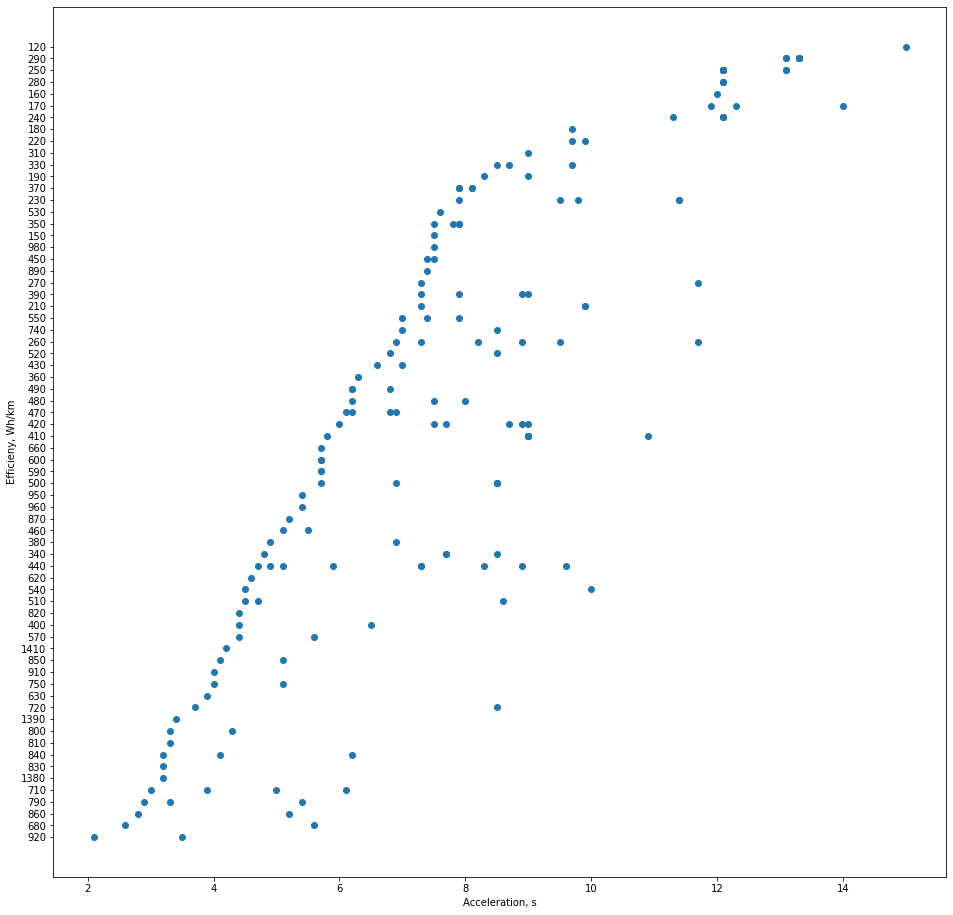

In [8]:
p=new_data["FastChargeSpeed"]
plt.figure(figsize=(16, 16))
plt.xlabel('Acceleration, s')
plt.ylabel('Efficieny, Wh/km')
plt.scatter(x, p) #could be modeled via Linear reg.


In [9]:
# use OLS to model TopSpeed as a function of acceleration
model = sm.OLS(y, x).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               TopSpeed   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.713
Method:                 Least Squares   F-statistic:                              433.2
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                    5.64e-49
Time:                        18:01:14   Log-Likelihood:                         -1042.8
No. Observations:                 174   AIC:                                      2088.
Df Residuals:                     173   BIC:                                      2091.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Acceleration    18.6257      0.895     20.813      0.000      16.859      20.392
==============================================================================
Omnibus:                        3.133   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.828
Skew:                           0.308   Prob(JB):                        0.243
Kurtosis:                       3.098   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""